## Fuel Efficiency in Relation to Various Automotive Data
This notebook will be exploring these questions.

- Create a visual showing the relationship between horsepower and fuel economy.
- Create a table summarizing fuel economy by country of origin
- Create a visual showing how fuel economy has changed over time
- Create a visual showing the relationship between car weight and fuel economy.
- Create a visual showing the relationship between car acceleration and country of origin.


In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
df=sns.load_dataset('mpg')

Below is our full data table.


In [77]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


### Efficiency Score
The cell below adds a new column to our table called "efficiency_score" which calculates how efficiently each mile in a car's "mpg" is used, based on their horsepower.

In [78]:
df['efficiency_score'] = round((100 * (df['mpg'] / df['horsepower'])), 2)
df[['name', 'efficiency_score', 'mpg', 'horsepower']].sort_values(by='efficiency_score', ascending=False).head(10)

,name,efficiency_score,mpg,horsepower
325,vw rabbit c (diesel),92.29,44.3,48.0
326,vw dasher (diesel),90.42,43.4,48.0
244,volkswagen rabbit custom diesel,89.79,43.1,48.0
394,vw pickup,84.62,44.0,52.0
322,mazda glc,71.69,46.6,65.0
343,toyota starlet,67.41,39.1,58.0
329,honda civic 1500 gl,66.57,44.6,67.0
310,toyota corolla tercel,63.50,38.1,60.0
246,mazda glc deluxe,63.08,32.8,52.0
324,datsun 210,62.77,40.8,65.0


#### Visual for Horsepower and Fuel Economy
This visual shows the relationship between horsepower and fuel economy. A higher horsepower is a lower fuel economy. You can get a better mpg with a lower horsepower.

<Axes: xlabel='mpg', ylabel='horsepower'>

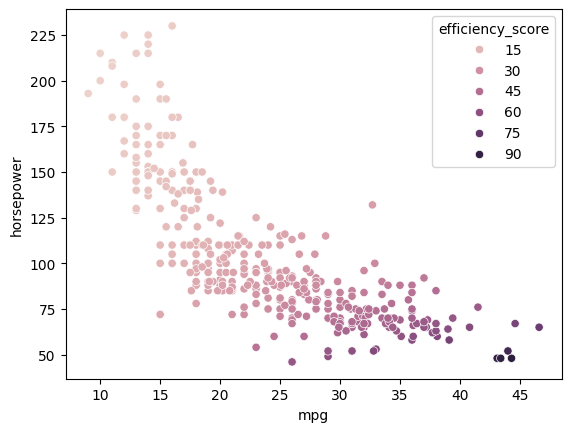

In [79]:
sns.scatterplot(data=df, x='mpg', y='horsepower', hue='efficiency_score')

### Fuel Efficiency by Origin
This table shows the top 10 cars with the best fuel efficiency by country of origin. Using this table we can see that the countries producing the most efficiency cars are in Europe and Japan.


In [80]:
df[['name', 'efficiency_score', 'mpg', 'horsepower', 'origin']].sort_values(by='efficiency_score', ascending=False).head(10)

,name,efficiency_score,mpg,horsepower,origin
325,vw rabbit c (diesel),92.29,44.3,48.0,europe
326,vw dasher (diesel),90.42,43.4,48.0,europe
244,volkswagen rabbit custom diesel,89.79,43.1,48.0,europe
394,vw pickup,84.62,44.0,52.0,europe
322,mazda glc,71.69,46.6,65.0,japan
343,toyota starlet,67.41,39.1,58.0,japan
329,honda civic 1500 gl,66.57,44.6,67.0,japan
310,toyota corolla tercel,63.50,38.1,60.0,japan
246,mazda glc deluxe,63.08,32.8,52.0,japan
324,datsun 210,62.77,40.8,65.0,japan


### Fuel Efficiency over Time
This is creating a table using aggregation to show the mean mpg and efficiency_score for each year of cars and how their fuel economy has changed over time.

In [81]:
fuelOverTime = df.groupby(['model_year']).agg({'mpg':'mean', 'efficiency_score':'mean'}).round({'mpg':2, 'efficiency_score':2}).sort_values(by='model_year').reset_index()
fuelOverTime

,model_year,mpg,efficiency_score
0,70,17.69,15.61
1,71,21.25,23.81
2,72,18.71,18.95
3,73,17.10,16.60
4,74,22.70,28.27
5,75,20.27,22.27
6,76,21.57,25.21
7,77,23.38,26.54
8,78,24.06,28.38
9,79,25.09,28.31


The visual below is demonstrating how the fuel efficiency of cars has steadily increased over time, although not linearly.

<Axes: xlabel='model_year', ylabel='efficiency_score'>

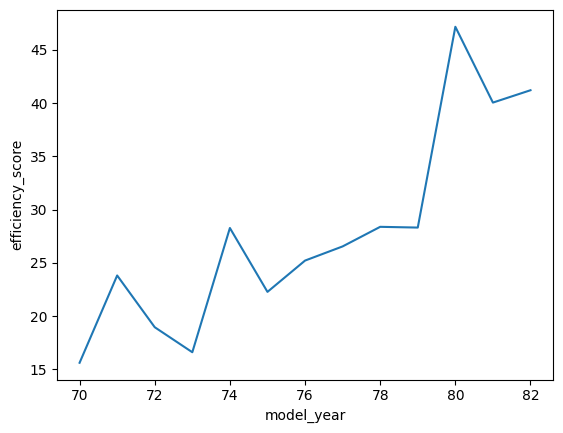

In [82]:
sns.lineplot(data=fuelOverTime, x='model_year', y='efficiency_score')

### Fuel Efficiency and Weight
This visual shows us the relationship between fuel efficiency and weight. As weight increases our mpg decreases resulting in a lower fuel efficiency.


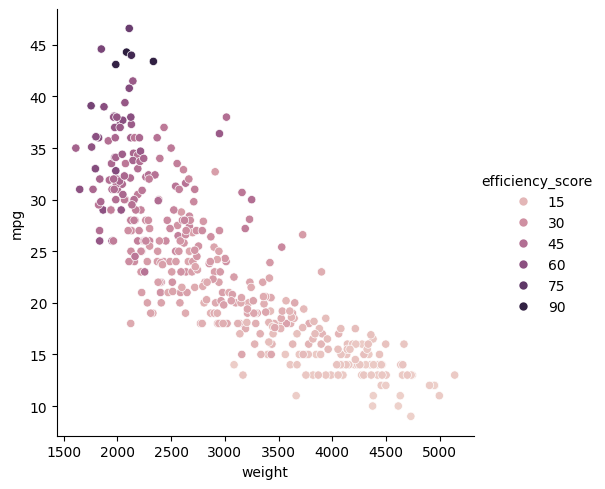

In [84]:
sns.relplot(data=df, x='weight', y='mpg', hue='efficiency_score')
plt.show()

### Average Acceleration by Origin
This is showing the average acceleration in cars from specific origins. This is significant to see that Europe has the best acceleration on average, because in our 'fuel efficiency by origin table' we noted that Europe has the top 4 cars with the best fuel efficiency. 

<Axes: xlabel='origin', ylabel='acceleration'>

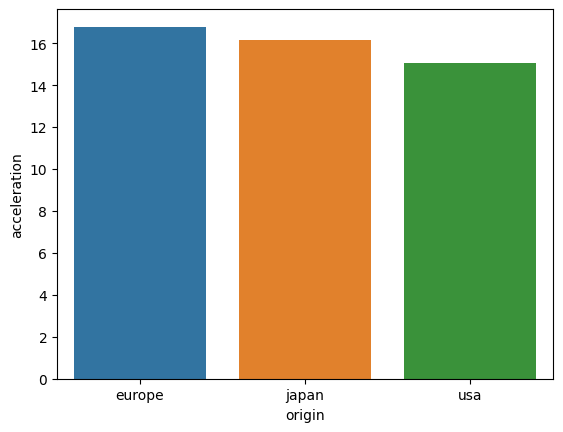

In [ ]:
df[['acceleration', 'origin']].sort_values(by='acceleration', ascending=False).head(20)
averageAcceleration = df.groupby('origin')['acceleration'].mean().reset_index()
sns.barplot(data = averageAcceleration, x = 'origin', y = 'acceleration', hue='origin')

## Conclusions

Our main insights are:
- Cars with a horsepower closer to their desired mpg will have a higher fuel efficiency
- Cars with a lower weight will have a higher fuel efficiency
- Cars from Europe and Japan have consistently demonstrated the highest level of fuel efficiency
- Lastly, fuel efficiency is constantly improving and has shown consistent growth from the period of 1970 to 1982